# Lead Score Case study Assignment by Gagan D

## Approach

1. Importing Data
2. Inspecting the Dataframe
3. Data Preparation
(Encoding Categorical Variables, Handling Null Values)
4. EDA
(univariate analysis, outlier detection, checking data imbalance)
5. Dummy Variable Creation
6. Test-Train Split
7. Feature Scaling
8. Looking at Correlations
9. Model Building
(Feature Selection Using RFE, Improvising the model further inspecting adjusted R-squared, VIF and p-vales)
10. Build final model
11. Model evaluation with different metrics
Sensitivity, Specificity

In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

### Step 1: Importing Data

In [5]:
lead_df = pd.read_csv("Leads.csv")
pd.set_option('display.max_columns', None)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [7]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# Missing Data Percentage 

round(lead_df.isnull().sum()/lead_df.shape[0], 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

Looking at the dataset we observed that following things need to be done:
- Encoding categorical variables 
- Missing value handling
- Convert the Select into the NaN
- Dropping columns having more than 70% null values

### Step 3: Data Preparation

**Converting Yes/No to 1/0's:**

In [13]:
# Encoding the variables with yes/no labels
for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'A free copy of Mastering The Interview']:

    lead_df[feature] = lead_df[feature].apply(lambda x : 1 if x=='Yes' else 0)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


**Converting SELECTs into NaNs:**

In [15]:
# Listing the categorical variables yet to be encoded
lead_df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [16]:
# Checking the labels of the remaining categorical columns

for col in lead_df.iloc[:,1:].select_dtypes(include='object').columns:
    print(col)
    print("_________________________________________________________________________________________________")
    print(lead_df[col].value_counts(normalize= True))
    print("_________________________________________________________________________________________________")

Lead Origin
_________________________________________________________________________________________________
Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: proportion, dtype: float64
_________________________________________________________________________________________________
Lead Source
_________________________________________________________________________________________________
Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.00

In [18]:
# Converting all the selects to NaN as the user didnt select any option from the list and "Select" is as good as "NaN"

lead_df = lead_df.replace('Select', np.nan)

In [20]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Missing Value Handling

In [27]:
#Dropping columns having more than 70% null values

lead_df = lead_df.drop(lead_df.loc[:,list(round(lead_df.isnull().sum()/lead_df.shape[0], 2)>0.70)].columns, axis = 1)

In [28]:
# As the Lead Quality depends upons the intuition of the employee, it will be safer to update the NaN to "Not Sure"

lead_df['Lead Quality'] = lead_df['Lead Quality'].replace(np.nan, 'Not Sure')

**Comment:**
There are too many variations in the columns ('Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score') and it is not safer to impute any values in the columns and hence we will drop these columns with very high percentage of missing data

In [31]:
lead_df = lead_df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],axis = 1)

In [34]:
# We can impute the MUMBAI into all the NULLs as most of the values belong to MUMBAI
lead_df['City'] = lead_df['City'].replace(np.nan, 'Mumbai')

# Since there is no significant difference among top 3 specialisation , hence it will be safer to impute NaN with Others
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Other_Specialization')

# For Tags column, more than 30% data is for "Will revert after reading the email" and hence we can impute NULLS with Will revert after reading the email
lead_df['Tags'] = lead_df['Tags'].replace(np.nan, 'Will revert after reading the email')

# More than 99% data is of "Better Career Prospects" and hence it is safer to impute NULLS with this value
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

# More than 85% data is of "Unemployed" and hence it is safer to impute NULLS with this value
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')

# More than 95% data is of "India" and hence it is safer to impute NULLS with this value
lead_df['Country'] = lead_df['Country'].replace(np.nan, 'India')

In [38]:
# Checking missing data percentage in the updated dataframe

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [41]:
# Remaining NULL values are less than 2% and hence these rows can be directly dropped
lead_df.dropna(inplace=True)

lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


### Step 4: Exploratory Data Analysis

In [44]:
# Lets start with the target variable and see if we have any data imbalance or not 
lead_df["Converted"].value_counts(normalize=True)

Converted
0    0.621446
1    0.378554
Name: proportion, dtype: float64

We have good representation of both the classes of data and hence we are good to go with the further analysis

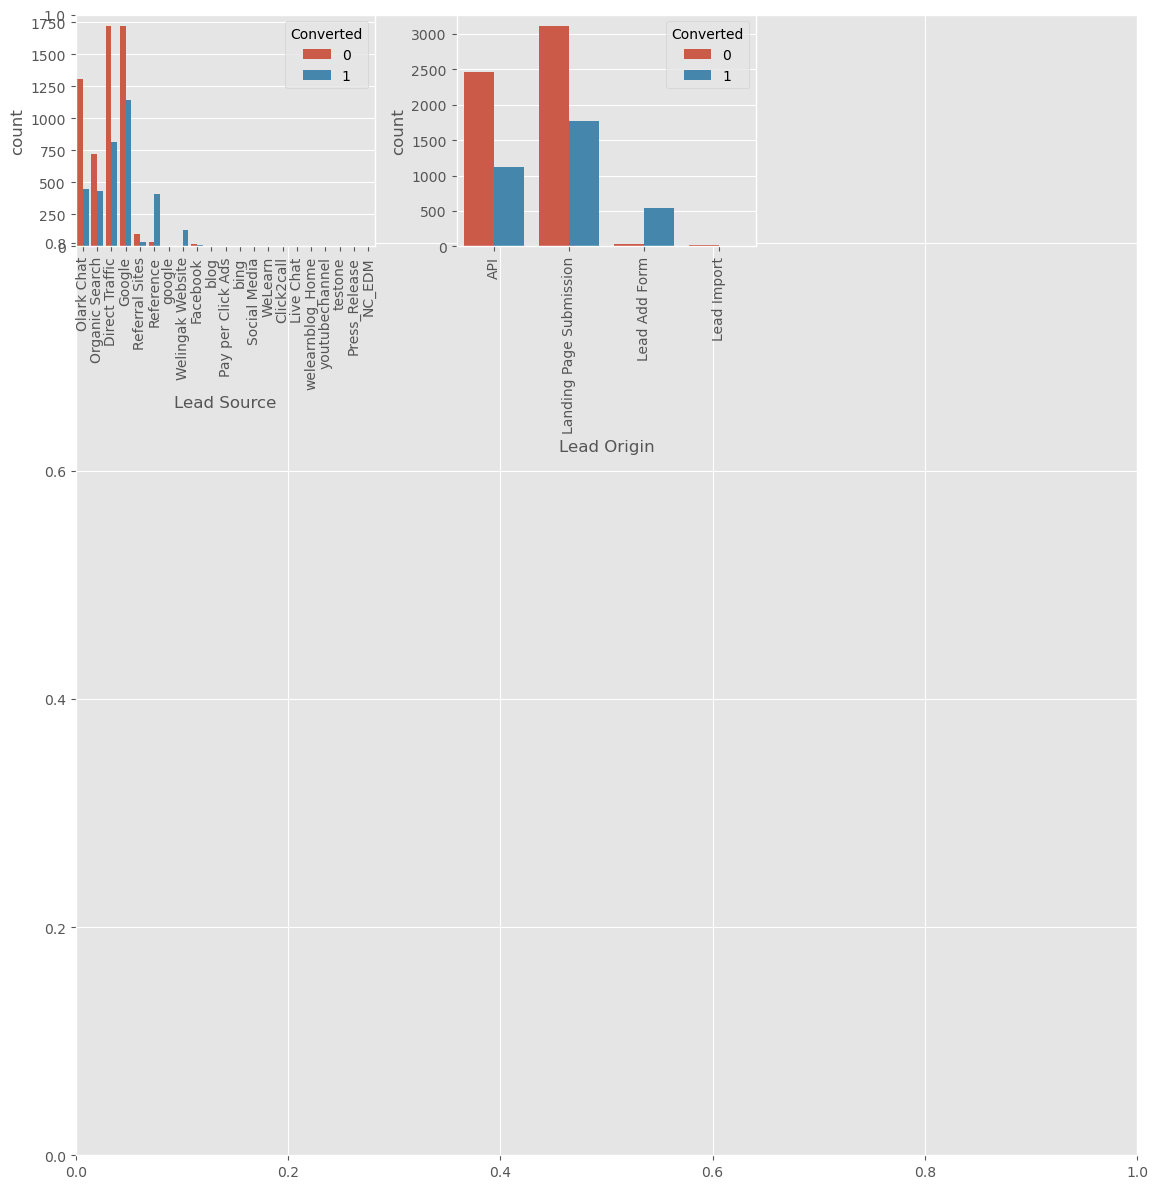

In [47]:
fig, ax = plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.countplot(x=feature, hue="Converted", data=lead_df)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


**OBSERVATION:**
- API and Landing Page Submission has less conversion rate(~30%) but counts of the leads from them are considerable
- The count of leads from the Lead Add Form is pretty low but the conversion rate is very high
- Lead Import has very less count as well as conversion rate and hence can be ignored

**To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' and also increasing the number of leads from 'Lead Add Form'**

In [49]:
# We can clearly observe that the count of leads from various sources are close to negligible and hence we can club them into "Others" source for better visualisation and analysis

lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')

lead_df['Lead Source'] = lead_df['Lead Source'].replace("google", 'Google')

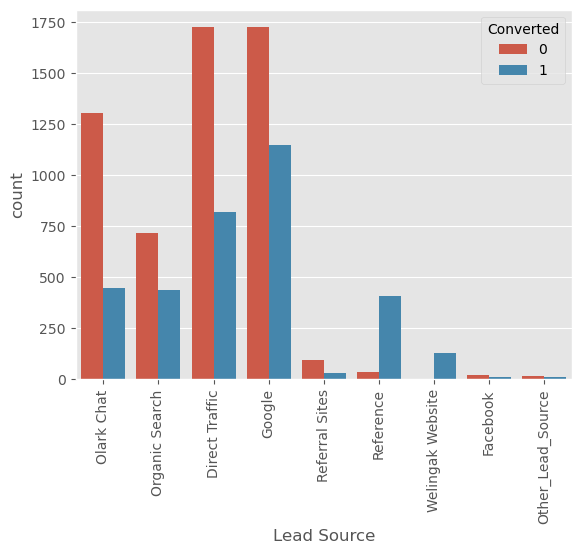

In [50]:
# Plotting Lead Source again

sns.countplot(x="Lead Source", hue="Converted", data= lead_df)
plt.xticks(rotation='vertical')
plt.show()

**OBSERVATION:**

- The count of leads from the Google and Direct Traffic is maximum
- The conversion rate of the leads from Reference and Welingak Website is maximum

**To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'**

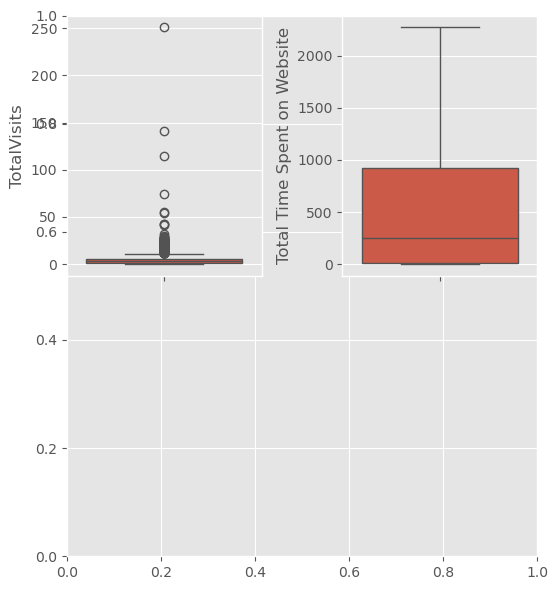

In [54]:
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(lead_df[feature])
    plt.tight_layout()

In [56]:
# There are lot of outliers in the Total Visits columns and we can cap this variable to 95 percetile 

q1 = lead_df["TotalVisits"].quantile(0.95)
lead_df["TotalVisits"][lead_df["TotalVisits"] >= q1] = q1

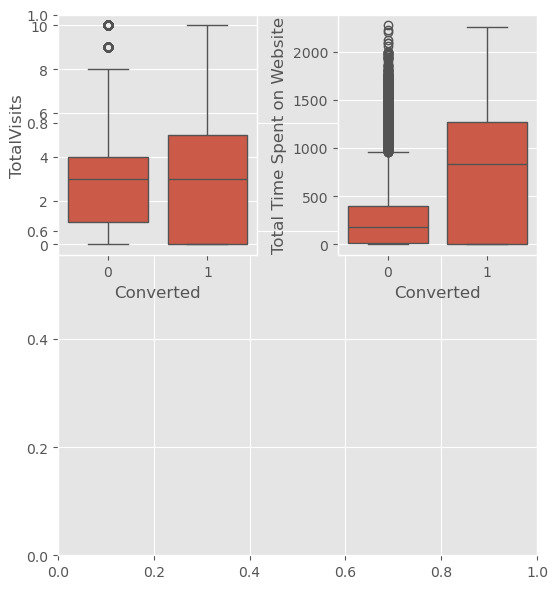

In [57]:
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = feature, x = 'Converted', data = lead_df)
    plt.tight_layout()

**OBSERVATION:**

- The median of both the conversion and non-conversion are same and hence nothing conclusive can be said using this information

- Users spending more time on the website are more likely to get converted

**Websites can be made more appealing so as to increase the time of the Users on websites**

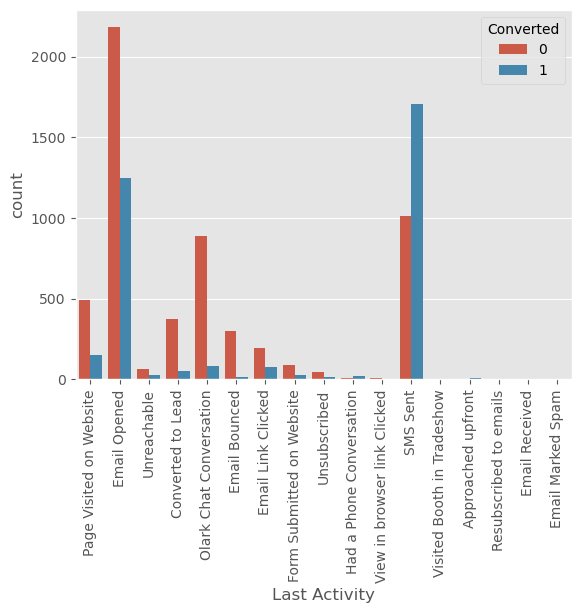

In [61]:
# Plotting the Last Activity again 

sns.countplot(x="Last Activity", hue="Converted", data= lead_df)
plt.xticks(rotation='vertical')
plt.show()

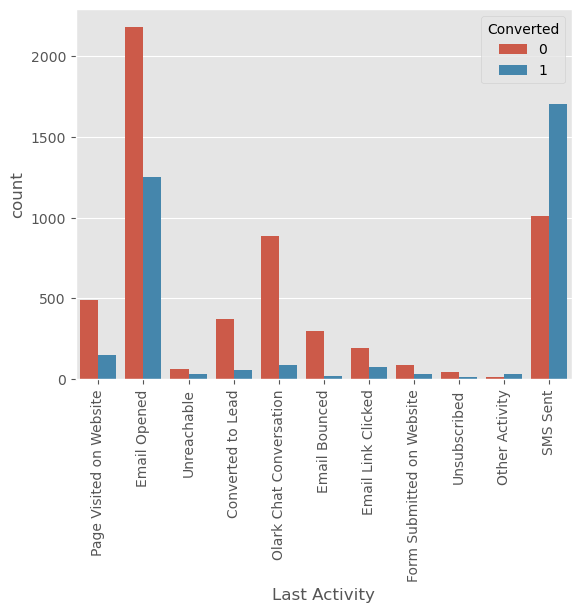

In [62]:
# Converting all the low count categories to the 'Others' category
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

# lets plot the Last Activity again 
sns.countplot(x="Last Activity", hue="Converted", data= lead_df)
plt.xticks( rotation='vertical')
plt.show()

**OBSERVATION:**

- The count of lst activity as "Email Opened" is max
- The conversion rate of SMS sent as last activity is maximum

**We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent**

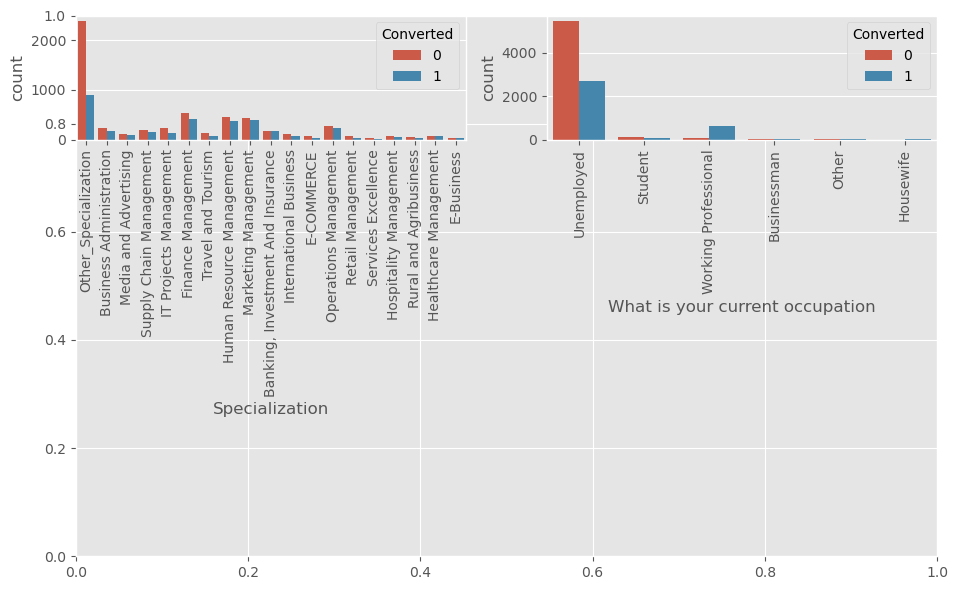

In [65]:
fig=plt.subplots(figsize=(10, 6))

for i, feature in enumerate(["Specialization", "What is your current occupation"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="Converted", data=lead_df)
    plt.xticks( rotation='vertical')
    plt.tight_layout()

**OBSERVATION:**

- Looking at above plot, no particular inference can be made for Specialization
- Looking at above plot, we can say that working professionals have high conversion rate
- Number of Unemployed leads are more than any other category

**To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads**

- Country, What matters most to you in choosing a course, City columns have most values corresponding to one value 
 such as India for Country, Mumbai for city and hence there is no particular insights for these columns

In [68]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace("Other", 'Other_Occupation')

In [70]:
lead_df[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
         "Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content"
         ,"I agree to pay the amount through cheque","A free copy of Mastering The Interview"]].describe()

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.000000
mean,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.318272
std,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.465831
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000


**OBSERVATION:**

- We can clearly see that most values in the all the columns are 0 i.e. "No" and hence no inference can be made using these columns

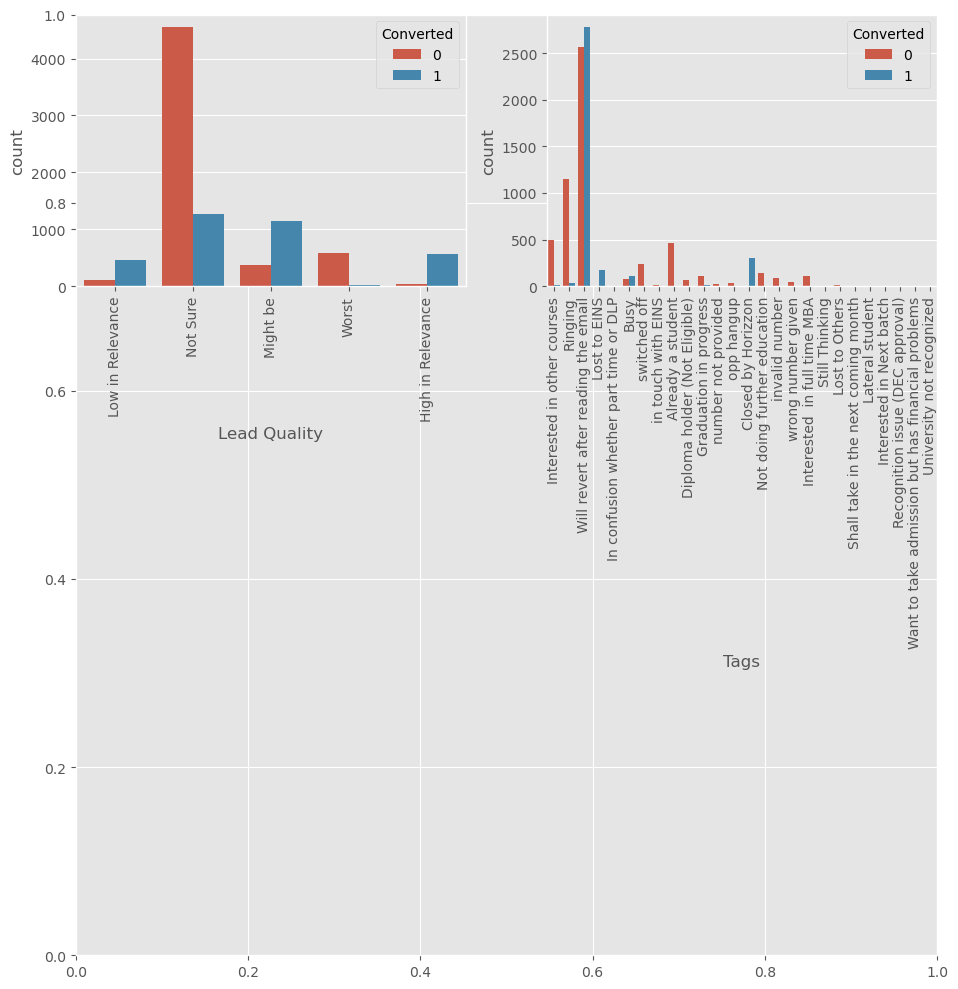

In [72]:
fig=plt.subplots(figsize=(10, 10))

for i, feature in enumerate(["Lead Quality", "Tags"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=feature, hue="Converted", data=lead_df)
    plt.xticks( rotation='vertical')
    plt.tight_layout()

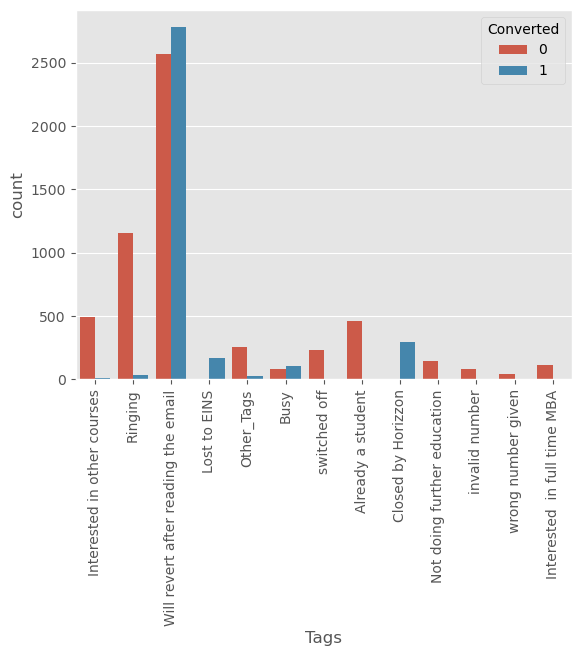

In [73]:
# Converting all low count categories to Others category
lead_df['Tags'] = lead_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

# lets plot the Tags again
sns.countplot(x="Tags", hue="Converted", data= lead_df)
plt.xticks( rotation='vertical')
plt.show()

**OBSERVATION:**

- 'Will revert after reading the email' and 'Closed by Horizzon' have high conversion rate

##### SUMMARY:

- **To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' Lead Origins and also increasing the number of leads from 'Lead Add Form'**


- **To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'**


- **Websites can be made more appealing so as to increase the time of the Users on websites**


- **We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent**


- **To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads**


- **We also observed that there are multiple columns which contains data of a single value only. As these columns do not contribute towards any inference, we can remove them from further analysis**

In [78]:
# Dropping unnecessary columns

lead_df = lead_df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call'],axis = 1)

lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


### Step 5: Dummy Variable Creation

In [80]:
dummy = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,True,False,Fa

In [81]:
lead_df = lead_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity'], axis=1)
lead_df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0


In [83]:
lead_df = pd.concat([lead_df, dummy], axis=1)
lead_df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

### Step 6: Test-Train Split

In [89]:
# Putting feature variable to X
X = lead_df.drop(['Prospect ID','Converted'], axis=1)
# Putting response variable to y
y = lead_df['Converted']

print(y)

X.head()

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,0,2.0,1532,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,F

In [91]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 7: Feature Scaling

In [95]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.179666,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1012,1,-0.432779,-0.540048,-0.179666,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9226,0,-1.150329,-0.888650,-1.132538,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,Fa

In [97]:
### Checking the Conversion Rate

print("Conversion rate is ", (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100)

Conversion rate is  37.85541106458012


### Step 8: Looking at Correlations

In [100]:
# Selecting only numeric columns from lead_df
numeric_cols = lead_df.select_dtypes(include=[np.number])

# Correlation between different numerical variables
conv_corr = numeric_cols.corr()

# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")

# Finding the top 10 correlations
top_correlations = conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(bool)).stack().sort_values(ascending=False).head(10)

top_correlations


TotalVisits                  Page Views Per Visit           0.737996
                             Total Time Spent on Website    0.361207
Converted                    Total Time Spent on Website    0.359261
Total Time Spent on Website  Page Views Per Visit           0.318350
Converted                    TotalVisits                    0.050742
Do Not Email                 Page Views Per Visit           0.036403
                             TotalVisits                    0.001856
Converted                    Page Views Per Visit           0.000260
Do Not Email                 Total Time Spent on Website   -0.046192
                             Converted                     -0.140786
dtype: float64

In [102]:
# Dropping highly correlated features
X_test = X_test.drop(['Lead Source_Facebook', 'Last Notable Activity_Unsubscribed', 'Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened', 'Last Notable Activity_Unreachable', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Page Visited on Website'], axis=1)

X_train = X_train.drop(['Lead Source_Facebook', 'Last Notable Activity_Unsubscribed', 'Last Notable Activity_SMS Sent',
                       'Last Notable Activity_Email Opened', 'Last Notable Activity_Unreachable', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Page Visited on Website'], axis=1)


In [104]:
conv_corr = X_train.corr()

### Step 9: Model Building

In [107]:
print(X_train.columns)


Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other_Lead_Source',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',


In [109]:
col = [
    'Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
    'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
    'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
    'Lead Source_Google', 'Lead Source_Olark Chat',
    'Lead Source_Organic Search', 'Lead Source_Other_Lead_Source',
    'Lead Source_Reference', 'Lead Source_Referral Sites',
    'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
    'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
    'Last Activity_Form Submitted on Website',
    'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
    'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
    'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
    'Specialization_Business Administration', 'Specialization_E-Business',
    'Specialization_E-COMMERCE', 'Specialization_Finance Management',
    'Specialization_Healthcare Management',
    'Specialization_Hospitality Management',
    'Specialization_Human Resource Management',
    'Specialization_IT Projects Management',
    'Specialization_International Business',
    'Specialization_Marketing Management',
    'Specialization_Media and Advertising',
    'Specialization_Operations Management',
    'Specialization_Other_Specialization',
    'Specialization_Retail Management',
    'Specialization_Rural and Agribusiness',
    'Specialization_Services Excellence',
    'Specialization_Supply Chain Management',
    'Specialization_Travel and Tourism',
    'What is your current occupation_Housewife',
    'What is your current occupation_Other_Occupation',
    'What is your current occupation_Student',
    'What is your current occupation_Unemployed',
    'What is your current occupation_Working Professional', 'Tags_Busy',
    'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
    'Tags_Interested in other courses', 'Tags_Lost to EINS',
    'Tags_Not doing further education', 'Tags_Other_Tags', 'Tags_Ringing',
    'Tags_Will revert after reading the email', 'Tags_invalid number',
    'Tags_switched off', 'Tags_wrong number given',
    'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
    'Lead Quality_Not Sure', 'Lead Quality_Worst', 'City_Other Cities',
    'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
    'City_Thane & Outskirts', 'City_Tier II Cities',
    'Last Notable Activity_Email Bounced',
    'Last Notable Activity_Email Marked Spam',
    'Last Notable Activity_Email Received',
    'Last Notable Activity_Form Submitted on Website',
    'Last Notable Activity_Had a Phone Conversation',
    'Last Notable Activity_Modified',
    'Last Notable Activity_Olark Chat Conversation',
    'Last Notable Activity_Resubscribed to emails',
    'Last Notable Activity_View in browser link Clicked'
]


In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    # Initialize the logistic regression model
    model = LogisticRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Get the predicted probabilities for the test set
    y_test_prob = model.predict_proba(X_test)[:,1]

    # Apply the cutoff to the probabilities
    y_test_pred = (y_test_prob >= cutoff).astype(int)

    # Calculate accuracy or other metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    confusion = confusion_matrix(y_test, y_test_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n {confusion}")

    return model


In [120]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.9)


Accuracy: 0.4895336026441425
Confusion Matrix:
 [[ 418 1316]
 [  74  915]]


LogisticRegression()

In [122]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')


In [124]:
X_train = X_train.fillna(0)  # or you can use another method like X_train.mean()
X_test = X_test.fillna(0)


In [126]:
print(X_train.dtypes)
print(X_test.dtypes)


Do Not Email                                            int64
TotalVisits                                           float64
Total Time Spent on Website                           float64
Page Views Per Visit                                  float64
Lead Origin_Landing Page Submission                      bool
                                                       ...   
Last Notable Activity_Had a Phone Conversation           bool
Last Notable Activity_Modified                           bool
Last Notable Activity_Olark Chat Conversation            bool
Last Notable Activity_Resubscribed to emails             bool
Last Notable Activity_View in browser link Clicked       bool
Length: 77, dtype: object
Do Not Email                                            int64
TotalVisits                                           float64
Total Time Spent on Website                             int64
Page Views Per Visit                                  float64
Lead Origin_Landing Page Submission         

In [128]:
# Convert boolean columns to numeric (0 and 1)
X_train = X_train.applymap(lambda x: int(x) if isinstance(x, bool) else x)
X_test = X_test.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [130]:
# Convert all columns to numeric (coerce errors to NaN)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Handle missing values
X_train = X_train.fillna(0)  # or another imputation strategy
X_test = X_test.fillna(0)

# Build the model
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.9)


Accuracy: 0.4895336026441425
Confusion Matrix:
 [[ 418 1316]
 [  74  915]]


LogisticRegression()

In [138]:
# Check if 'Last Notable Activity' exists in your data
if 'Last Notable Activity' in X_train.columns:
    col = ['Last Notable Activity', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']  # Add more relevant columns
else:
    # Replace with other relevant columns if 'Last Notable Activity' is missing
    col = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']  # Adjust the list


In [142]:
print(X_train.columns)  # To verify available columns
print(X_test.columns)


Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other_Lead_Source',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',


In [154]:
# Example of correctly specifying the column names (use actual column names in place of ellipsis)
col = ['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google', 'Last Activity_Email Bounced',
       'Specialization_Business Administration', 'Tags_Busy', 'Lead Quality_Low in Relevance', 
       'City_Other Cities', 'Last Notable Activity_Email Bounced']  # Continue adding your actual column names

# Now use the build_model_cutoff function
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.9)


Accuracy: 0.4263679764965112
Confusion Matrix:
 [[ 415 1319]
 [ 243  746]]


LogisticRegression()

In [158]:
# Check if the columns exist in X_train and X_test
print(X_train.columns)
print(X_test.columns)


Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other_Lead_Source',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',


In [160]:
col = ['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google', 
       'Last Activity_Email Bounced', 'Specialization_Business Administration', 
       'Tags_Busy', 'Lead Quality_Low in Relevance', 'City_Other Cities', 
       'Last Notable Activity_Email Bounced']  # Add more if needed


In [162]:
# Use the defined 'col' to select specific columns for training and testing
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.9)


Accuracy: 0.4263679764965112
Confusion Matrix:
 [[ 415 1319]
 [ 243  746]]


LogisticRegression()

In [167]:
# Check if 'Last Notable Activity' exists in the data
if 'Last Notable Activity' in X_train.columns:
    col = ['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
           'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
           'Lead Source_Google', 'Last Activity_Email Bounced', 'Tags_Busy',
           'Lead Quality_Low in Relevance', 'City_Other Cities',
           'Last Notable Activity']  # Add other required columns
else:
    col = ['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
           'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
           'Lead Source_Google', 'Last Activity_Email Bounced', 'Tags_Busy',
           'Lead Quality_Low in Relevance', 'City_Other Cities']  # Adjust without 'Last Notable Activity'

# Now build the model using the selected columns
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.9)


Accuracy: 0.4263679764965112
Confusion Matrix:
 [[ 415 1319]
 [ 243  746]]


LogisticRegression()

### Step 10: Feature Selection Using RFE

In [263]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


In [267]:
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)  
rfe.fit(X_train, y_train)
selected_features = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
print(selected_features)


[('Do Not Email', True, 1), ('TotalVisits', False, 54), ('Total Time Spent on Website', False, 5), ('Page Views Per Visit', False, 52), ('Lead Origin_Landing Page Submission', False, 12), ('Lead Origin_Lead Add Form', False, 2), ('Lead Origin_Lead Import', False, 15), ('Lead Source_Google', False, 44), ('Lead Source_Olark Chat', False, 4), ('Lead Source_Organic Search', False, 45), ('Lead Source_Other_Lead_Source', False, 39), ('Lead Source_Reference', False, 55), ('Lead Source_Referral Sites', False, 30), ('Lead Source_Welingak Website', True, 1), ('Last Activity_Email Bounced', False, 29), ('Last Activity_Email Link Clicked', False, 22), ('Last Activity_Email Opened', False, 27), ('Last Activity_Form Submitted on Website', False, 48), ('Last Activity_Olark Chat Conversation', False, 21), ('Last Activity_Other Activity', False, 6), ('Last Activity_Page Visited on Website', False, 26), ('Last Activity_SMS Sent', True, 1), ('Last Activity_Unreachable', False, 10), ('Last Activity_Unsubs

In [268]:
col = X_train.columns[rfe.support_]

In [271]:
# Check data types of each column in X_train
print(X_train.dtypes)

# Check for non-numeric columns
non_numeric_columns = X_train.select_dtypes(exclude=[np.number])
print(non_numeric_columns.columns)


Do Not Email                                            int64
TotalVisits                                           float64
Total Time Spent on Website                           float64
Page Views Per Visit                                  float64
Lead Origin_Landing Page Submission                     int64
                                                       ...   
Last Notable Activity_Had a Phone Conversation          int64
Last Notable Activity_Modified                          int64
Last Notable Activity_Olark Chat Conversation           int64
Last Notable Activity_Resubscribed to emails            int64
Last Notable Activity_View in browser link Clicked      int64
Length: 77, dtype: object
Index([], dtype='object')


In [273]:
# Apply one-hot encoding to categorical columns
X_train_encoded = pd.get_dummies(X_train, drop_first=True)


In [275]:
# Check for missing values in the dataset
print(X_train_encoded.isnull().sum())

# If there are missing values, handle them (e.g., using fillna or dropna)
X_train_encoded = X_train_encoded.fillna(0)  # Filling NaNs with 0, or you can use a more appropriate method


Do Not Email                                          0
TotalVisits                                           0
Total Time Spent on Website                           0
Page Views Per Visit                                  0
Lead Origin_Landing Page Submission                   0
                                                     ..
Last Notable Activity_Had a Phone Conversation        0
Last Notable Activity_Modified                        0
Last Notable Activity_Olark Chat Conversation         0
Last Notable Activity_Resubscribed to emails          0
Last Notable Activity_View in browser link Clicked    0
Length: 77, dtype: int64


In [277]:
# Step 1: Add a constant
X_train_sm = sm.add_constant(X_train_encoded)

# Step 2: Fit the logistic regression model
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Step 3: Fit and summarize the model
result = logm1.fit()
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           77
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1275.8
Date:                Sun, 22 Sep 2024   Deviance:                       2551.6
Time:                        19:40:33   Pearson chi2:                 3.54e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6059
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [278]:
print(X_train_encoded.head())


      Do Not Email  TotalVisits  Total Time Spent on Website  \
3009             0    -0.432779                    -0.160255   
1012             1    -0.432779                    -0.540048   
9226             0    -1.150329                    -0.888650   
4750             0    -0.432779                     1.643304   
7987             0     0.643547                     2.017593   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3009             -0.179666                                    1   
1012             -0.179666                                    1   
9226             -1.132538                                    0   
4750             -0.179666                                    1   
7987              0.058552                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Google  \
3009                          0                        0                   0   
1012                          0                     

##### Assessing the model with StatsModels

In [282]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1543.7
Date:                Sun, 22 Sep 2024   Deviance:                       3087.3
Time:                        19:40:35   Pearson chi2:                 3.73e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5713
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1792      0.218     -5.399      0.000      -1.607      -0.751
Do Not Email                                            -1.2135      0.221     -5.495      0.000      -1.646      -0.781
Lead Source_Welingak Website                             4.1435      0.735      5.636      0.000       2.703       5.584
Last Activity_SMS Sent                                   1.9719      0.103     19.182      0.000       1.770       2.173
What is your current occupation_Working Professional     1.3633      0.293      4.660      0.000       0.790       1.937
Tags_Busy                                                3.4375      0.322     10.682      0.000       2.807       4.068
Tags_Closed by Horizzon                                  8.4930      0.770     11.030      0.000       6.984      10.002
Tags_Lost to EINS                                        9.4098      0.766     12.278      0.000       7.908      10.912
Tags_Ringing                                            -1.8980      0.332     -5.725      0.000      -2.548      -1.248
Tags_Will revert after reading the email                 3.6248      0.230     15.787      0.000       3.175       4.075
Tags_invalid number                                    -22.3554   1.34e+04     -0.002      0.999   -2.63e+04    2.63e+04
Tags_switched off                                       -2.4546      0.583     -4.207      0.000      -3.598      -1.311
Lead Quality_Not Sure                                   -3.3564      0.132    -25.480      0.000      -3.615      -3.098
Lead Quality_Worst                                      -3.8914      0.819     -4.751      0.000      -5.497      -2.286
Last Notable Activity_Modified                          -1.7147      0.108    -15.917      0.000      -1.926      -1.504
Last Notable Activity_Olark Chat Conversation           -1.2792      0.350     -3.657      0.000      -1.965      -0.594
========================================================================================================================
"""

In [284]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.286856
1012    0.318457
9226    0.002074
4750    0.742927
7987    0.994127
1281    0.988081
2880    0.286856
4971    0.705549
7536    0.920243
1248    0.002074
dtype: float64

In [188]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29726851, 0.01725284, 0.31817304, 0.68322929, 0.76130075,
       0.48019541, 0.12357746, 0.83139357, 0.82579168, 0.72520702])

##### Creating a dataframe with the true convertion status and the predicted probabilities

In [191]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.297269,3009
1,0,0.017253,1012
2,0,0.318173,9226
3,1,0.683229,4750
4,1,0.761301,7987


In [193]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.297269,3009,0
1,0,0.017253,1012,0
2,0,0.318173,9226,0
3,1,0.683229,4750,1
4,1,0.761301,7987,1


In [195]:
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.7274444969296174


#### Checking VIFs

In [198]:
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)

calculate_vif(X_train[col])

                              Features  Variance Inflation Factor
1                          TotalVisits                       2.43
3                 Page Views Per Visit                       2.43
0                         Do Not Email                       1.78
6          Last Activity_Email Bounced                       1.72
4  Lead Origin_Landing Page Submission                       1.67
5                   Lead Source_Google                       1.30
2          Total Time Spent on Website                       1.18
9                    City_Other Cities                       1.13
8        Lead Quality_Low in Relevance                       1.06
7                            Tags_Busy                       1.03


All variables have a good value of VIF. But we observed earlier that the column "Tags_invalid number" has high p-value and hence we will drop this column and remake the model.

In [292]:
# Assuming 'col' is a pandas Index object
col = col.drop('Tags_invalid number', errors='ignore').tolist()


In [294]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1549.5
Date:                Sun, 22 Sep 2024   Deviance:                       3098.9
Time:                        19:44:45   Pearson chi2:                 3.64e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5705
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3454      0.219     -6.156      0.000      -1.774      -0.917
Do Not Email                                            -1.2059      0.220     -5.473      0.000      -1.638      -0.774
Lead Source_Welingak Website                             4.1414      0.735      5.636      0.000       2.701       5.582
Last Activity_SMS Sent                                   1.9466      0.102     19.052      0.000       1.746       2.147
What is your current occupation_Working Professional     1.3983      0.295      4.738      0.000       0.820       1.977
Tags_Busy                                                3.6109      0.321     11.261      0.000       2.982       4.239
Tags_Closed by Horizzon                                  8.6409      0.770     11.217      0.000       7.131      10.151
Tags_Lost to EINS                                        9.5553      0.767     12.462      0.000       8.052      11.058
Tags_Ringing                                            -1.7137      0.330     -5.197      0.000      -2.360      -1.067
Tags_Will revert after reading the email                 3.7871      0.230     16.481      0.000       3.337       4.237
Tags_switched off                                       -2.2659      0.582     -3.892      0.000      -3.407      -1.125
Lead Quality_Not Sure                                   -3.3480      0.131    -25.482      0.000      -3.605      -3.090
Lead Quality_Worst                                      -3.8770      0.820     -4.727      0.000      -5.485      -2.269
Last Notable Activity_Modified                          -1.7013      0.107    -15.826      0.000      -1.912      -1.491
Last Notable Activity_Olark Chat Conversation           -1.2809      0.350     -3.663      0.000      -1.966      -0.596
========================================================================================================================
"""

In [205]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Convert_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.297269,3009,0
1,0,0.017253,1012,0
2,0,0.318173,9226,0
3,1,0.683229,4750,1
4,1,0.761301,7987,1


In [207]:
# Let's check the overall accuracy.
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

Accuracy score 0.7274444969296174


The accuracy is still practically the same.

##### Let's now check the VIFs again

In [211]:
calculate_vif(X_train[col])

                              Features  Variance Inflation Factor
1                          TotalVisits                       2.43
3                 Page Views Per Visit                       2.43
0                         Do Not Email                       1.78
6          Last Activity_Email Bounced                       1.72
4  Lead Origin_Landing Page Submission                       1.67
5                   Lead Source_Google                       1.30
2          Total Time Spent on Website                       1.18
9                    City_Other Cities                       1.13
8        Lead Quality_Low in Relevance                       1.06
7                            Tags_Busy                       1.03


**Comment:**
All variables have a good value of VIF and p-values. So we need not drop any more variables and we can proceed with making predictions using this model only

In [214]:
# function name : evaluate_model
# argumet : y_true, y_predicted
# prints Confusion matrix, accuracy, Sensitivity, Specificity, False Positive Rate, Positive Predictive Value
# returns accuracy, Sensitivity, Specificity

def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    # Predicted     not_converted    converted
    # Actual
    # not_converted        TN         FP
    # converted            FN         TP

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP+FN)
    specificity_score = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    
    if print_score:
        print("Confusion Matrix :\n", confusion)
        print("Accuracy :", accuracy_sc)
        print("Sensitivity :", sensitivity_score)
        print("Specificity :", specificity_score)
        print("Precision :", precision_sc)
        
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc

In [216]:
# Evaluating model
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)

Confusion Matrix :
 [[3399  506]
 [1225 1221]]
Accuracy : 0.7274444969296174
Sensitivity : 0.4991823385118561
Specificity : 0.8704225352112676
Precision : 0.7070063694267515


(0.7274444969296174,
 0.4991823385118561,
 0.8704225352112676,
 0.7070063694267515)

### Step 11: Plotting the ROC Curve

An ROC curve 
- shows tradeoff between sensitivity and specificity (increase in one will cause decrease in other).
- The closer the curve follows the y-axis and then the top border of the ROC space, means more area under the curve and the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space i.e. the reference line, means less area and the less accurate is the test.

Here, our goal is to have achieve good sensitivity score

In [219]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [221]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

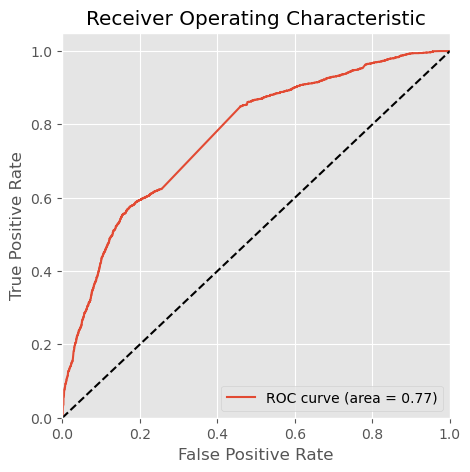

In [223]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

### Step 12: Finding optimal value of the cut off

In [225]:
# Predicting Convert status with different probability cutoffs

for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.297269,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.017253,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.318173,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.683229,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.761301,7987,1,1,1,1,1,1,1,1,1,0,0


In [228]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs from 0.1 to 0.9.

df = pd.DataFrame(columns = ['probability_score','accuracy_score','sensitivity_score','specificity_score','precision_score'])

for i in [float(x)/10 for x in range(10)]:
    (accuracy_score,sensitivity_score,specificity_score,precision_sc) = evaluate_model(y_train_pred_final.Convert, y_train_pred_final[i])
    df.loc[i] =[i,accuracy_score,sensitivity_score,specificity_score,precision_sc]

df

,probability_score,accuracy_score,sensitivity_score,specificity_score,precision_score
0.0,0.0,0.385136,1.000000,0.000000,0.385136
0.1,0.1,0.425917,0.995094,0.069398,0.401121
0.2,0.2,0.535979,0.932543,0.287580,0.450523
0.3,0.3,0.649819,0.861815,0.517029,0.527792
0.4,0.4,0.729334,0.573181,0.827145,0.675012
0.5,0.5,0.727444,0.499182,0.870423,0.707006
0.6,0.6,0.712014,0.402698,0.905762,0.728012
0.7,0.7,0.687451,0.277187,0.944430,0.757542
0.8,0.8,0.655015,0.132870,0.982074,0.822785
0.9,0.9,0.631082,0.046198,0.997439,0.918699


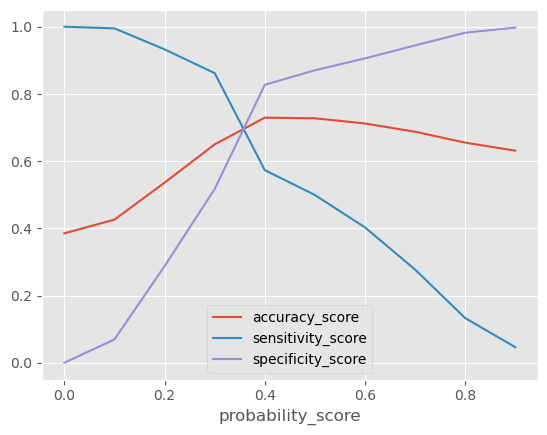

In [229]:
df.plot.line(x='probability_score', y=['accuracy_score','sensitivity_score','specificity_score'])
plt.show()

### Precision-Recall Trade off

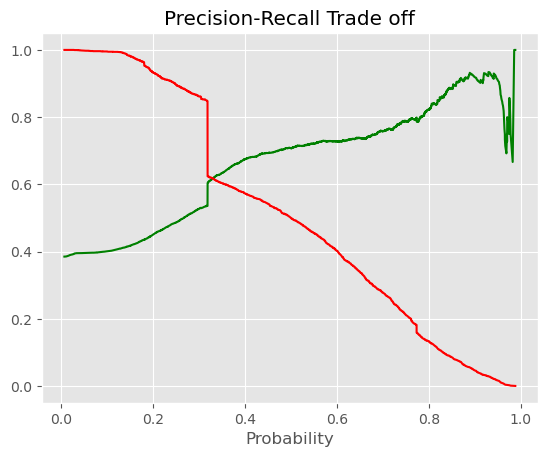

In [232]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

**Comment:**

In Sensitivity-Specificity-Accuracy plot 0.27 probability looks optimal.
In Precision-Recall Curve 0.3 looks optimal.

We are taking 0.27 is the optimum point as a cutoff probability and assigning Lead Score in training data.

In [235]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.27 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Convert_predicted,Lead_Score
0,0,0.297269,3009,1,30
1,0,0.017253,1012,0,2
2,0,0.318173,9226,1,32
3,1,0.683229,4750,1,68
4,1,0.761301,7987,1,76


In [236]:
# Evaluating model performance on training data

evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted, print_score=True)

Confusion Matrix :
 [[1778 2127]
 [ 289 2157]]
Accuracy : 0.6195874665407023
Sensitivity : 0.8818479149632052
Specificity : 0.45531370038412294
Precision : 0.5035014005602241


(0.6195874665407023,
 0.8818479149632052,
 0.45531370038412294,
 0.5035014005602241)

In [237]:
# Getting the predicted values on the train set
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,3271,1.000000,1,100
1,1,1490,1.000000,1,100
2,0,7936,1.000000,1,100
3,1,4216,0.861157,1,86
4,0,3830,1.000000,1,100


In [239]:
# Evaluating model performance on test data

evaluate_model(y_predicted_final.Converted, y_predicted_final.final_predicted, print_score=True)

Confusion Matrix :
 [[  13 1721]
 [   3  986]]
Accuracy : 0.3668747704737422
Sensitivity : 0.9969666329625885
Specificity : 0.007497116493656286
Precision : 0.3642408570373107


(0.3668747704737422,
 0.9969666329625885,
 0.007497116493656286,
 0.3642408570373107)

### Step 12 : Final Model

In [242]:
# Builds a logistic regression model and returns predicted values on training dataset
# when training data, test data and probability cutoff is given

def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print("------------------Result of training data-------------------")
    print(y_train_pred_final.head())
    
    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("------------------Result of test data-------------------")
    print(y_test_pred_final.head())
    
    print("------------------Model Evaluation Metrics-------------------")
    evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score=True)
    
    return y_test_pred_final

In [246]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.27)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.297269                  1          30
1         1012          0             0.017253                  0           2
2         9226          0             0.318173                  1          32
3         4750          1             0.683229                  1          68
4         7987          1             0.761301                  1          76
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             1.000000                  1         100
1         1490          1             1.000000                  1         100
2         7936          0             1.000000                  1         100
3         4216          1             0.861157                  1          86
4         3830          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,1.000000,1,100
1,1490,1,1.000000,1,100
2,7936,0,1.000000,1,100
3,4216,1,0.861157,1,86
4,3830,0,1.000000,1,100
...,...,...,...,...,...
2718,850,0,1.000000,1,100
2719,2879,0,1.000000,1,100
2720,6501,1,1.000000,1,100
2721,7155,0,1.000000,1,100


In [248]:
print("Features used in Final Model :", col)

print("-----------------------Feature Importance--------------------")
print(res.params)

Features used in Final Model : ['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Lead Origin_Landing Page Submission', 'Lead Source_Google', 'Last Activity_Email Bounced', 'Tags_Busy', 'Lead Quality_Low in Relevance', 'City_Other Cities']
-----------------------Feature Importance--------------------
const                                 -0.164512
Do Not Email                          -0.752644
TotalVisits                            0.027526
Total Time Spent on Website            0.940005
Page Views Per Visit                  -0.237811
Lead Origin_Landing Page Submission   -0.576001
Lead Source_Google                    -0.251055
Last Activity_Email Bounced           -2.072385
Tags_Busy                              0.707803
Lead Quality_Low in Relevance          1.989446
City_Other Cities                     -0.066363
dtype: float64


### Conclusion:

- The logistic regression model predicts the probability of the target variable having a certain value, rather than predicting the value of the target variable directly. Then a cutoff of the probability is used to obtain the predicted value of the target variable.


- Here, the logistic regression model is used to predict the probabilty of conversion of a customer. 


- Optimum cut off is chosen to be 0.27 i.e. 
any lead with greater than 0.27 probability of converting is predicted as Hot Lead (customer will convert) and
any lead with 0.27 or less probability of converting is predicted as Cold Lead (customer will not convert)


- Our final Logistic Regression Model is built with 14 features.


- Features used in final model are ['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation']
       
- The top three categorical/dummy variables in the final model are ‘Tags_Lost to EINS’, ‘Tags_Closed by Horizzon’, ‘Lead Quality_Worst’ with respect to the absolute value of their coefficient factors. 

‘Tags_Lost to EINS’, ‘Tags_Closed by Horizzon’ are obtained by encoding original categorical variable ‘Tags’.
‘Lead Quality_Worst’ is obtained by encoding the categorical variable ‘Lead Quality’.
       

- Tags_Lost to EINS            (Coefficient factor = 9.578632)
- Tags_Closed by Horizzon      (Coefficient factor = 8.555901)
- Lead Quality_Worst           (Coefficient factor =-3.943680)


- The final model has Sensitivity of 0.928, this means the model is able to predict 92% customers out of all the converted customers, (Positive conversion) correctly.


- The final model has Precision of 0.68, this means 68% of predicted hot leads are True Hot Leads.


- We have also built an reusable code block which will predict Convert value and Lead Score given training, test data and a cut-off. Different cutoffs can be used depending on the use-cases (for eg. when high sensitivity is required, when model have optimum precision score etc.)

### Subjective Question
3.	X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.


In [252]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.1)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.297269                  1          30
1         1012          0             0.017253                  0           2
2         9226          0             0.318173                  1          32
3         4750          1             0.683229                  1          68
4         7987          1             0.761301                  1          76
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             1.000000                  1         100
1         1490          1             1.000000                  1         100
2         7936          0             1.000000                  1         100
3         4216          1             0.861157                  1          86
4         3830          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,1.000000,1,100
1,1490,1,1.000000,1,100
2,7936,0,1.000000,1,100
3,4216,1,0.861157,1,86
4,3830,0,1.000000,1,100
...,...,...,...,...,...
2718,850,0,1.000000,1,100
2719,2879,0,1.000000,1,100
2720,6501,1,1.000000,1,100
2721,7155,0,1.000000,1,100


### Subjective Question
4.	Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

In [256]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.9)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.297269                  0          30
1         1012          0             0.017253                  0           2
2         9226          0             0.318173                  0          32
3         4750          1             0.683229                  0          68
4         7987          1             0.761301                  0          76
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             1.000000                  1         100
1         1490          1             1.000000                  1         100
2         7936          0             1.000000                  1         100
3         4216          1             0.861157                  0          86
4         3830          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,1.000000,1,100
1,1490,1,1.000000,1,100
2,7936,0,1.000000,1,100
3,4216,1,0.861157,0,86
4,3830,0,1.000000,1,100
...,...,...,...,...,...
2718,850,0,1.000000,1,100
2719,2879,0,1.000000,1,100
2720,6501,1,1.000000,1,100
2721,7155,0,1.000000,1,100
